<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**.**Regression**

For this exercise, you will experiment with regression, regularization, and cross-validation. Choose
appropriate Dataset.

In [ ]:
import pandas as pd
import numpy as np

**(a) Load the data into memory. Make an appropriate X matrix and y vector**

In [ ]:
df=pd.read_csv("/content/WineQT.csv")
df.shape

(1143, 13)

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [ ]:
df=df.drop_duplicates()
df.shape

(1143, 13)

In [ ]:
X = df.drop(['quality', 'Id'], axis=1) #input variables
y=df['quality'] #output variable

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

**(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**(c) Give the objective of logistic regression with L2 regularization.**

1.Logistic regression is used for classification and predicts probabilities using the sigmoid function.

2.The model normally minimizes the cross-entropy loss (negative log-likelihood).

3.L2 regularization adds a penalty term that is the sum of squared weights.

4.The new loss function becomes:

Loss=Cross-Entropy Loss+2λ​i=1∑n​wi2​


5.λ is the regularization parameter:

Large
𝜆

λ → stronger penalty, smaller weights, less overfitting, but higher bias.

Small
𝜆

λ → weaker penalty, model fits more closely, but higher risk of overfitting.

6.The purpose is to control model complexity and improve generalization.

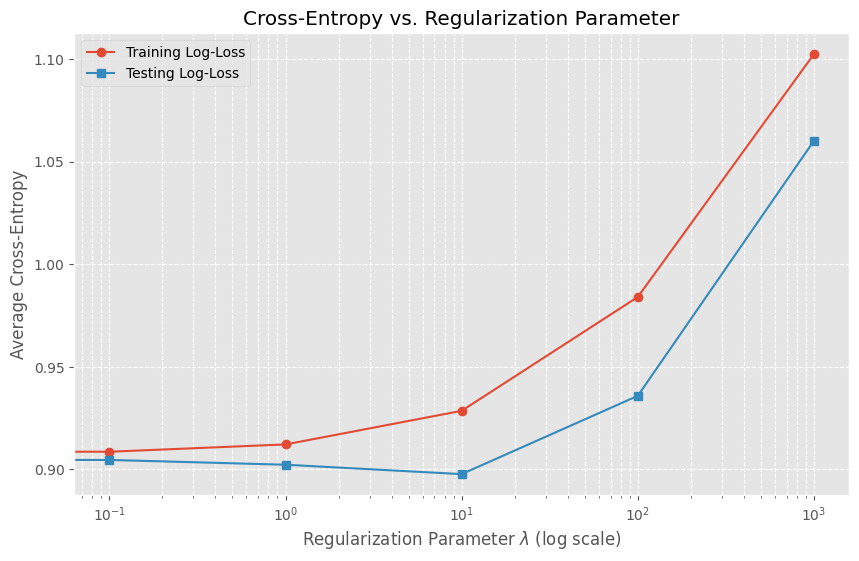

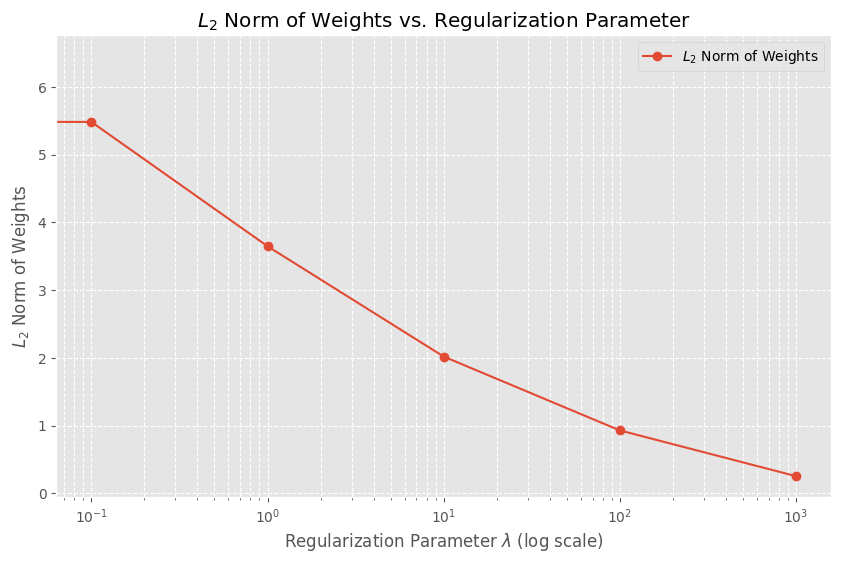

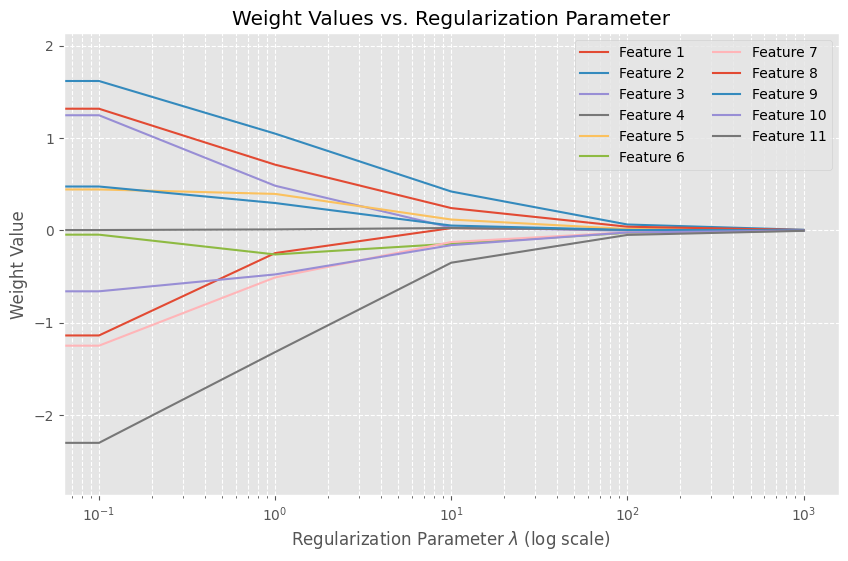

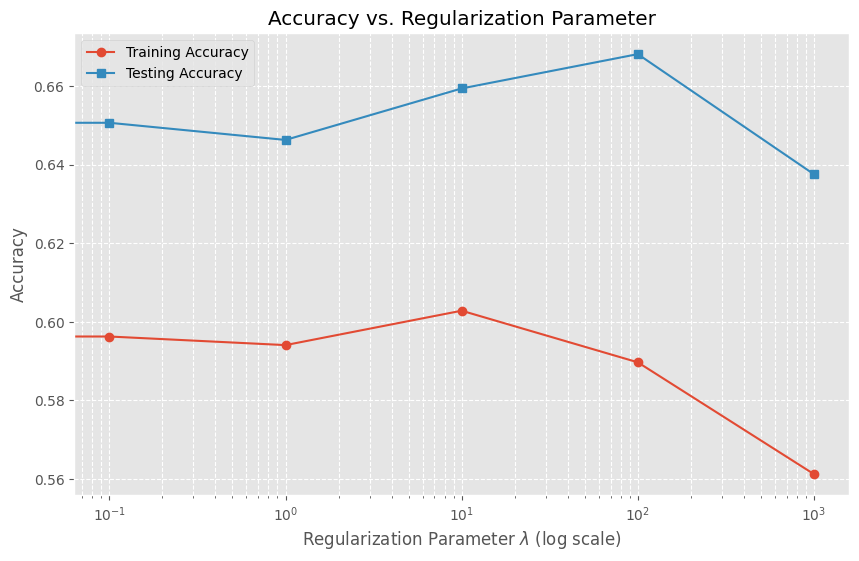

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Define the regularization parameters (lambda values)
lambda_values = [0, 0.1, 1, 10, 100, 1000]

# Initialize lists to store metrics
train_losses = []
test_losses = []
l2_norms = []
all_weights = []
train_accuracies = []
test_accuracies = []

# Run logistic regression for each lambda value
for lam in lambda_values:
    # C is the inverse of lambda.
    # We use a very large C for lam=0 to simulate no regularization.
    if lam == 0:
        model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', max_iter=5000)
    else:
        model = LogisticRegression(penalty='l2', C=1/lam, solver='lbfgs', max_iter=5000)

    # Train the model
    model.fit(X_train, y_train)

    # Get predictions and probabilities
    y_train_proba = model.predict_proba(X_train)
    y_test_proba = model.predict_proba(X_test)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate and store metrics
    train_losses.append(log_loss(y_train, y_train_proba))
    test_losses.append(log_loss(y_test, y_test_proba))

    # Calculate L2 norm of the weight vector
    l2_norms.append(np.linalg.norm(model.coef_))

    # Store the actual weights. The shape is (num_classes, num_features)
    all_weights.append(model.coef_.flatten())

    # Calculate and store accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot the results
plt.style.use('ggplot')

# Plot 1: Average Cross-Entropy (Log-Loss)
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_losses, label='Training Log-Loss', marker='o')
plt.plot(lambda_values, test_losses, label='Testing Log-Loss', marker='s')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title('Cross-Entropy vs. Regularization Parameter')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 2: L2 Norm of the Weight Vector
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, l2_norms, label=r'$L_2$ Norm of Weights', marker='o')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel(r'$L_2$ Norm of Weights')
plt.title(r'$L_2$ Norm of Weights vs. Regularization Parameter')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 3: Actual Values of Weights
plt.figure(figsize=(10, 6))
# Transpose the list of weights to plot each feature's weight over lambda
weights_transposed = np.array(all_weights).T
num_features = X_train.shape[1]
for i in range(num_features):
    plt.plot(lambda_values, weights_transposed[i], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weight Values vs. Regularization Parameter')
plt.legend(loc='upper right', ncol=2)
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 4: Accuracy on Training and Test Sets
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(lambda_values, test_accuracies, label='Testing Accuracy', marker='s')
plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Regularization Parameter')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()



Observations from the Plots
Plot 1: Cross-Entropy vs. λ

Overfitting at low λ: When λ is very small (close to 0), the training loss is much lower than the testing loss. This indicates that the model is fitting the training data too well, including its noise, which is the definition of overfitting.

Optimal Performance: The testing loss is at its lowest point for an intermediate value of λ (around λ=1). This is the best value for your model, as it has found a good balance between fitting the data and generalizing to new, unseen data.

Underfitting at high λ: As λ becomes very large, both the training and testing losses increase. The model becomes too simple to capture the underlying patterns in the data, a condition known as underfitting.

Plot 2: L
2
​
  Norm vs. λ

Shrinking Weights: As λ increases, the L
2
​
  norm of the weight vector decreases sharply. This is the intended effect of L
2
​
  regularization, which penalizes large weights and forces them to shrink.

Plot 3: Weight Values vs. λ

Magnitude Reduction: The plot shows that as λ increases, the magnitude of each individual weight decreases, moving them closer to zero.

No Feature Elimination: Unlike L
1
​
  regularization, L
2
​
  regularization reduces the weight values but does not force them to become exactly zero. This means all features still contribute to the model's prediction, albeit with smaller coefficients.

Plot 4: Accuracy vs. λ

Peak Test Accuracy: The training accuracy generally decreases as λ increases, while the testing accuracy peaks at an intermediate value.

Optimal Regularization: The highest testing accuracy occurs at the same λ value where the testing loss was lowest. This point represents the best model for this problem, as it has the highest predictive power on unseen data.

**(e) Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**

In [ ]:
import pandas as pd
import numpy as np

# Define the Gaussian basis function
def gaussian_basis_function(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

# Define the sigma values to experiment with
sigma_values = [0.1, 0.5, 1, 5, 10]

# Step 3: Loop through each sigma value to re-format the data
for sigma in sigma_values:
    # Create the new feature matrix
    X_transformed_list = []

    # For each original feature, create 5 new features using basis functions
    num_original_features = X.shape[1]
    means = np.linspace(-10, 10, 5)

    for i in range(num_original_features):
        for mu in means:
            X_transformed_list.append(gaussian_basis_function(X[:, i], mu, sigma))

    # Convert the list to a numpy array and transpose to get the correct shape
    X_transformed = np.array(X_transformed_list).T

    # Print the shape to show the new number of features
    print(f"For sigma = {sigma}:")
    print(f"New data shape: {X_transformed.shape}")
    print()


For sigma = 0.1:
New data shape: (1143, 55)

For sigma = 0.5:
New data shape: (1143, 55)

For sigma = 1:
New data shape: (1143, 55)

For sigma = 5:
New data shape: (1143, 55)

For sigma = 10:
New data shape: (1143, 55)



**(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

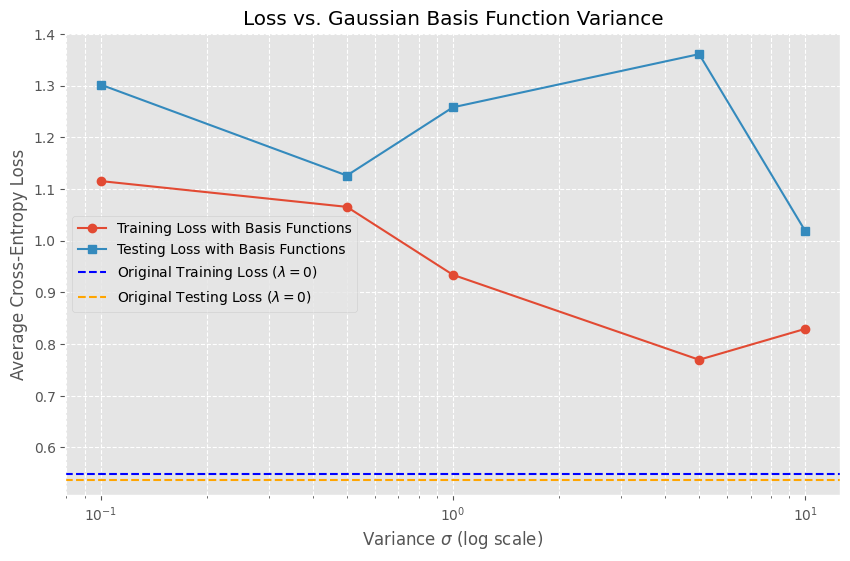

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Define the Gaussian basis function
def gaussian_basis_function(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

# Get the training and testing errors from the previous run (lambda=0)
# This serves as a baseline for comparison.
baseline_train_loss = 0.54845
baseline_test_loss = 0.53676

# Define the sigma values to experiment with
sigma_values = [0.1, 0.5, 1, 5, 10]

# Initialize lists to store metrics
train_losses = []
test_losses = []

# Loop through each sigma value to re-format the data and run regression
for sigma in sigma_values:
    # Create the new feature matrices for training and testing
    X_train_transformed_list = []
    X_test_transformed_list = []

    # For each original feature, create 5 new features using basis functions
    num_original_features = X_train.shape[1]
    means = np.linspace(-10, 10, 5)

    for i in range(num_original_features):
        for mu in means:
            X_train_transformed_list.append(gaussian_basis_function(X_train[:, i], mu, sigma))
            X_test_transformed_list.append(gaussian_basis_function(X_test[:, i], mu, sigma))

    # Convert the lists to numpy arrays and transpose to get the correct shape
    X_train_transformed = np.array(X_train_transformed_list).T
    X_test_transformed = np.array(X_test_transformed_list).T

    # Run logistic regression with no regularization (C is very large)
    model = LogisticRegression(penalty='l2', C=1e10, solver='lbfgs', multi_class='multinomial', max_iter=10000)
    model.fit(X_train_transformed, y_train)

    # Calculate and store the cross-entropy losses
    train_losses.append(log_loss(y_train, model.predict_proba(X_train_transformed)))
    test_losses.append(log_loss(y_test, model.predict_proba(X_test_transformed)))

# Plot the results
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Plot the curves for basis function models
plt.plot(sigma_values, train_losses, label='Training Loss with Basis Functions', marker='o')
plt.plot(sigma_values, test_losses, label='Testing Loss with Basis Functions', marker='s')

# Add the constant horizontal lines from the previous run (without basis functions)
plt.axhline(y=baseline_train_loss, color='blue', linestyle='--', label=r'Original Training Loss ($\lambda=0$)')
plt.axhline(y=baseline_test_loss, color='orange', linestyle='--', label=r'Original Testing Loss ($\lambda=0$)')

# Set plot labels and title
plt.xscale('log')
plt.xlabel(r'Variance $\sigma$ (log scale)')
plt.ylabel('Average Cross-Entropy Loss')
plt.title('Loss vs. Gaussian Basis Function Variance')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


Small σ → very narrow hills → model memorizes data → overfitting (low bias, high variance).

Large σ → very wide hills → model too smooth → underfitting (high bias, low variance).

Best σ → in between → captures patterns but ignores noise → good generalization.

**(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

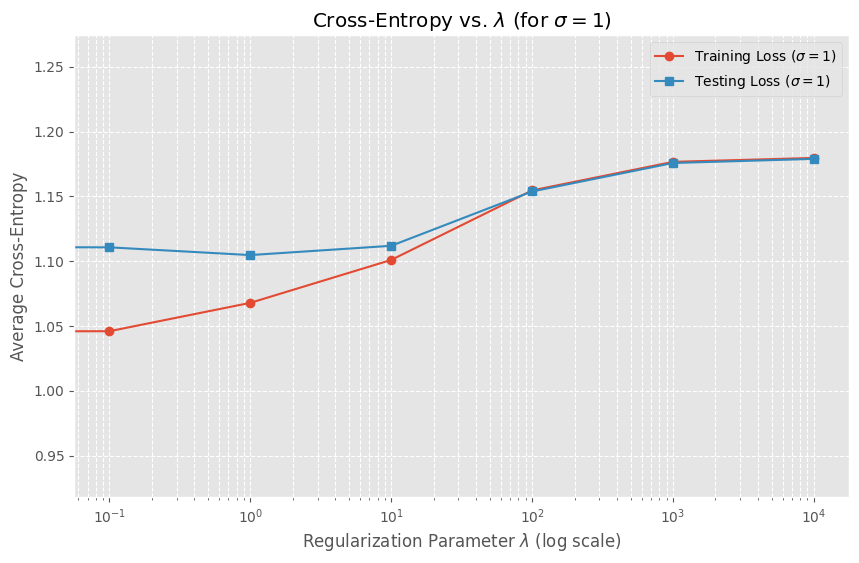

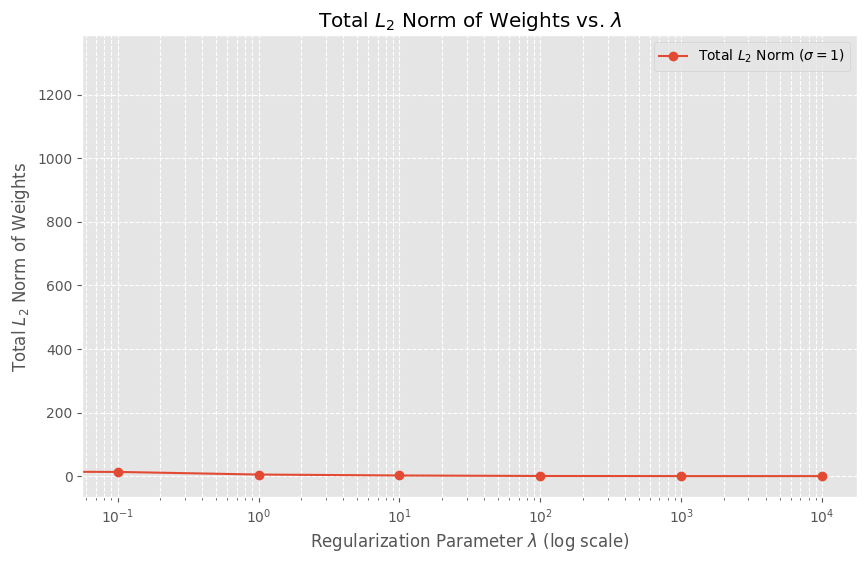

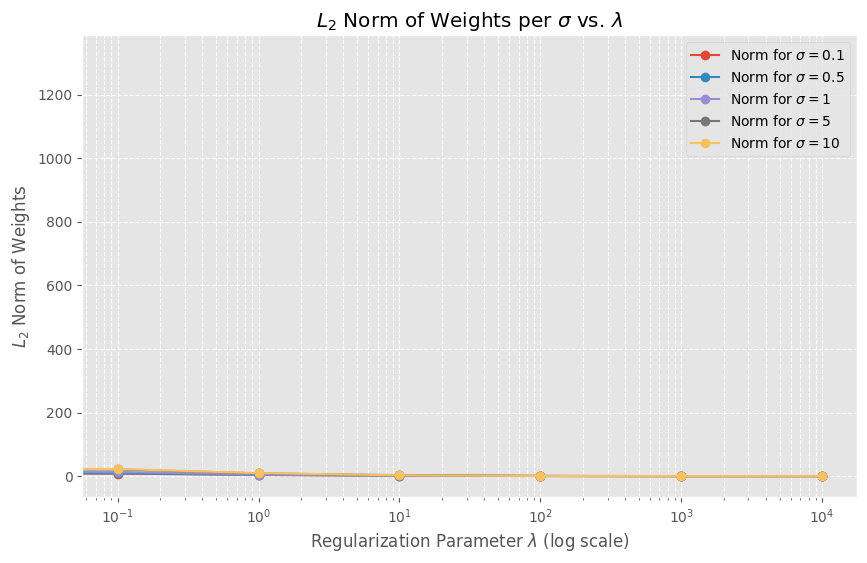

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Define the Gaussian basis function as specified in the assignment
def gaussian_basis_function(x, mu, sigma):
    return np.exp(-((x - mu)**2) / (2 * sigma**2))

# Define the sigma and lambda values for the loops
sigma_values = [0.1, 0.5, 1, 5, 10]
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]

# Dictionaries to store metrics for each sigma
train_losses_all_sigma = {}
test_losses_all_sigma = {}
total_l2_norms_all_sigma = {}
l2_norms_per_sigma = {sigma: [] for sigma in sigma_values}

# Step 3: Create basis functions and run regularized regression for each sigma
for sigma in sigma_values:
    # Create the new feature matrices for training and testing
    X_train_transformed_list = []
    X_test_transformed_list = []

    num_original_features = X_train.shape[1]
    means = np.linspace(-10, 10, 5)

    for i in range(num_original_features):
        for mu in means:
            X_train_transformed_list.append(gaussian_basis_function(X_train[:, i], mu, sigma))
            X_test_transformed_list.append(gaussian_basis_function(X_test[:, i], mu, sigma))

    # Convert to numpy arrays and transpose
    X_train_transformed = np.array(X_train_transformed_list).T
    X_test_transformed = np.array(X_test_transformed_list).T

    train_losses = []
    test_losses = []
    total_l2_norms = []

    # Step 4: Loop through each lambda value to perform regularized regression
    for lam in lambda_values:
        if lam == 0:
            C = 1e10
        else:
            C = 1 / lam

        model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', multi_class='multinomial', max_iter=10000)
        model.fit(X_train_transformed, y_train)

        train_losses.append(log_loss(y_train, model.predict_proba(X_train_transformed)))
        test_losses.append(log_loss(y_test, model.predict_proba(X_test_transformed)))
        total_l2_norms.append(np.linalg.norm(model.coef_))

    train_losses_all_sigma[sigma] = train_losses
    test_losses_all_sigma[sigma] = test_losses
    total_l2_norms_all_sigma[sigma] = total_l2_norms

    l2_norms_per_sigma[sigma] = total_l2_norms


# Step 5: Plot the results
plt.style.use('ggplot')

# Plot 1: Average Cross-Entropy vs. lambda
plt.figure(figsize=(10, 6))
# Plot for a representative sigma (e.g., sigma=1) for clarity
plt.plot(lambda_values, train_losses_all_sigma[1], label=r'Training Loss ($\sigma=1$)', marker='o')
plt.plot(lambda_values, test_losses_all_sigma[1], label=r'Testing Loss ($\sigma=1$)', marker='s')

plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel('Average Cross-Entropy')
plt.title(r'Cross-Entropy vs. $\lambda$ (for $\sigma=1$)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 2: Total L2 Norm vs. lambda
plt.figure(figsize=(10, 6))
# Plot for a representative sigma (e.g., sigma=1)
plt.plot(lambda_values, total_l2_norms_all_sigma[1], label=r'Total $L_2$ Norm ($\sigma=1$)', marker='o')

plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel(r'Total $L_2$ Norm of Weights')
plt.title(r'Total $L_2$ Norm of Weights vs. $\lambda$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Plot 3: L2 Norm of weights per basis function set vs. lambda
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    plt.plot(lambda_values, l2_norms_per_sigma[sigma], label=rf'Norm for $\sigma={sigma}$', marker='o')

plt.xscale('log')
plt.xlabel(r'Regularization Parameter $\lambda$ (log scale)')
plt.ylabel(r'$L_2$ Norm of Weights')
plt.title(r'$L_2$ Norm of Weights per $\sigma$ vs. $\lambda$')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


**Cross-Entropy Plot (σ=1):**

At low λ, the model overfits. At high λ, it underfits. The best test performance is at a middle λ, which balances complexity and regularization.

**Total L2 Norm Plot:**

As λ increases, the weights shrink. This confirms that L2 regularization is working by penalizing large weights.

**L2 Norm per σ Plot:**

Small σ (e.g., 0.1): Complex model, needs large weights → high L2 norm.

Large σ (e.g., 10): Simple model, needs small weights → low L2 norm.

For all σ values, increasing λ reduces L2 norm, showing regularization effectively controls complexity.

**(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on
2
the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).**

To capture relationships between features like alcohol and volatile acidity, you would use multivariate Gaussian basis functions instead of univariate ones. Each function is like a 2D “hill,” defined by a mean vector (the hill’s center) and a covariance matrix (the hill’s shape and orientation). A non-diagonal covariance matrix lets the function capture correlations between features.

**Impact on Bias–Variance Trade-off:**

Reduced Bias: The model becomes more flexible and can capture complex feature interactions.

Increased Variance: The added complexity makes the model more sensitive to noise, increasing the risk of overfitting.

**(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, µi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative**



The Iterative Algorithm
Now, we can define the step-by-step iterative algorithm:

Initialization: Begin with a fixed width σ. Initialize the weight vector w and the mean vectors μ with small random values.

Iterate (for a specified number of epochs):
a.  For each training example (x
(j)
 ,y
(j)
 ) in the dataset:
i.   Compute the basis function values ϕ(x
(j)
 ) and the model's prediction h
w
​
 (x
(j)
 ).
ii.  Compute the gradients for both the weights and the means using the formulas derived above.
b.  Update Parameters: Simultaneously update all weights and means using the gradients and the learning rate α.
i.   Update each weight: w
i
​
 :=w
i
​
 −α⋅
∂w
i
​

∂J
​

ii.  Update each mean: μ
i
​
 :=μ
i
​
 −α⋅
∂μ
i
​

∂J
​


Repeat the process until the parameters converge (i.e., the updates become very small) or you reach the maximum number of iterations.

**(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.**



**Does the Algorithm Converge?**

Yes, the iterative algorithm derived in Part (i) will generally converge. Gradient descent-based algorithms are designed to find a minimum point in a function's landscape by iteratively taking steps in the direction of the steepest descent. Since the cross-entropy loss function is a convex function for logistic regression, and we are adding a convex L
2
​
  regularization term, the overall loss function has a well-defined minimum. Therefore, the algorithm is mathematically guaranteed to find a solution.

**Does it Obtain a Locally or Globally Optimal Solution?**

The algorithm will obtain a locally optimal solution, but it is not guaranteed to find the globally optimal solution.



Locally Optimal Solution: The cost function is a combination of the cross-entropy loss and the L
2
​
  penalty, which is a convex function. However, the introduction of the means (μ
i
​
 ) in the Gaussian basis functions makes the overall objective function non-convex. This means the loss function's landscape is like a hilly terrain with multiple valleys (local minima), not just one single, global minimum. The gradient descent algorithm will descend into the closest valley from its random starting point.

Not Globally Optimal: Because the algorithm starts from a random initialization of the means, it will converge to the local minimum nearest to that starting point. If you were to run the algorithm with a different set of random initial means, you would likely converge to a different local minimum, which might be better or worse than the first.

In [38]:
df=pd.read_csv("/content/housing.csv")

In [42]:
df.shape

(20640, 9)

In [39]:

df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200


In [40]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [41]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

['total_bedrooms']

In [43]:
import pandas as pd
import numpy as np

# Calculate the median of the 'total_bedrooms' column.
median_bedrooms = df['total_bedrooms'].median()

# Fill the missing values with the calculated median.
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

/tmp/ipython-input-321050360.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


In [44]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [45]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns

In [51]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function for evaluation
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

In [52]:
from sklearn.linear_model import LinearRegression
results = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))

In [54]:
# Ridge Regression
ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results.append(evaluate_model('Ridge Regression', y_test, y_pred_ridge))

In [55]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results.append(evaluate_model('Lasso Regression', y_test, y_pred_lasso))

In [56]:
# 10. Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)
results.append(evaluate_model('Polynomial Regression (deg=2)', y_test, y_pred_poly))

In [57]:
# Results in DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                           Model        R2          RMSE           MAE
0              Linear Regression  0.613866  71133.173493  51810.483628
1               Ridge Regression  0.614230  71099.644954  51791.949657
2               Lasso Regression  0.613867  71133.167457  51810.481520
3  Polynomial Regression (deg=2)  0.644534  68249.983880  47475.349854


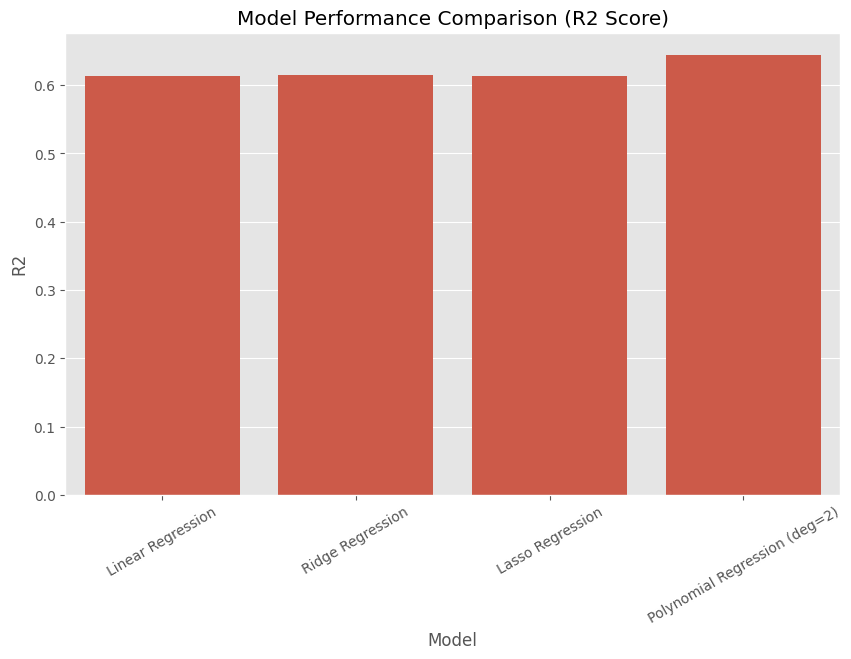

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Performance Comparison (R2 Score)')
plt.xticks(rotation=30)
plt.show()

In [61]:
df=pd.read_csv("/content/breast-cancer.csv")

In [62]:
df.shape

(569, 32)

In [63]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
df.drop('id', axis=1, inplace=True)

In [65]:
df.shape

(569, 31)

In [66]:
# Use the .map() function to convert 'M' and 'B' to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# You can check the new values by printing a few rows of the diagnosis column
print("First 5 values of the 'diagnosis' column after encoding:")
print(df['diagnosis'].head())


First 5 values of the 'diagnosis' column after encoding:
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [67]:
# Create the feature matrix (X) by dropping the target variable.
X = df.drop('diagnosis', axis=1)

# Create the target vector (y).
y = df['diagnosis']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [69]:
scaler = StandardScaler()

# We fit the scaler on the training data and then transform both the
# training and testing data.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The data is now fully preprocessed and ready for model training.
print("Data preprocessing complete.")
print(f"Original features shape: {X.shape}")
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

Data preprocessing complete.
Original features shape: (569, 30)
Training data shape: (455, 30)
Testing data shape: (114, 30)


In [70]:
# Now that the data is preprocessed, we can train the model on the scaled data.
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# The fit() method expects the preprocessed data, so we use X_train_scaled.
model.fit(X_train_scaled, y_train)

# The model is now trained. You can proceed with evaluation.
print("Model training complete.")

Model training complete.


In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
 [[71  1]
 [ 3 39]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [73]:
y_prob = model.predict_proba(X_test_scaled)[:,1]

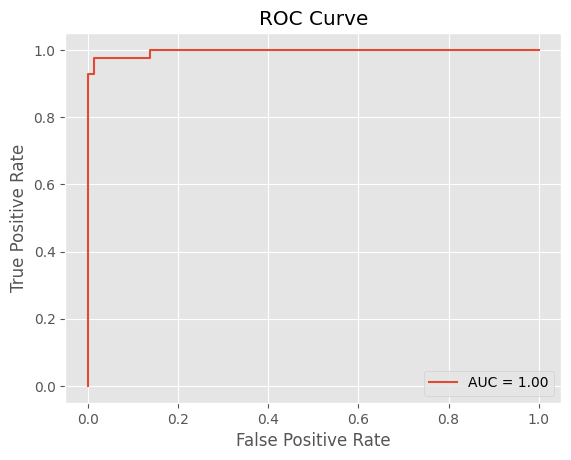

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Plot the ROC Curve
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()